# **World Happiness Analysis**

# Purpose

The Life Ladder, also known as the Cantril Self-Anchoring Scale, is a tool designed to measure subjective well-being or happiness. This metric 
The primary purpose of this analysis is to investigate whether the Life Ladder score, a measure of subjective well-being, can be predicted based on other socio-economic and psychological variables for a given country. Additionally, we aim to identify which factors have the most significant impact on the Life Ladder score, providing insights into the key drivers of happiness and life satisfaction.

In this analysis, we want to predict whether the Life Ladder score based on other variables for one country. We are also interested in understanding which factors have a bigger impact on the Life Ladder score. It is highly relevant as it seeks to uncover the determinants of subjective well-being, providing valuable insights that can inform policy decisions, enhance individual and community well-being, and contribute to the broader understanding of happiness. Identifying the key factors that influence the Life Ladder score can help governments, organizations, and communities focus their efforts on areas that significantly impact life satisfaction.

# Variable Definitions

- Life Ladder: It is a subjective measure of well being or happiness used in surveys such as the Gallup World Poll covering years from 2005/06 to 2023. The life ladder measures how individuals rate their current life situation on a scale from 0, representing the worst possible life, to 10, representing the best possible life.
- Log GDP per capita: A statistical measure that transforms GDP per capita, which is the total economic output of a country divided by its population and represents the average economic productivity per person, using a logarithmic scale. It helps manage the wide range of values, making it easier to compare relative differences between countries or over time.
- Social Support: Social support is measured by the national average of responses to the Gallup World Poll (GWP) question, "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?" This variable captures the proportion of respondents who answered affirmatively, indicating the presence of a reliable social network they can rely on in times of trouble. This measure reflects the extent of perceived social safety nets and community support available to individuals in different countries.
- Health Life Expectancy at Birth: Based on data from WHO GHO data updated 2020.12.04. Interpolation and extrapolation are used for the years because original data is only 2000, 2010, 2015, 2019 Freedom to make life choices: National average of responses to GWP question: “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” (From 0 to 1)
- Generosity: the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of Corruption: “The national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” Respondents provided 0/1 answers, and the average was taken.
- Positive Affect: Takes three positive measures into account: Laughing, enjoyment, and experiencing interesting things. If you experience these three things a lot in one day, your positive affect score would be higher.
Negative Affect: Takes three negative measures into account: worrying, sadness, and anger. If you experience these three things often in one day, your negative affect score would be higher.

In [ ]:
from google.colab import files
uploaded = files.upload()

#Download the file from Kaggle and upload the updated CSV via the "Choose Files" button after running this block

Saving World-happiness-report-updated_2024.csv to World-happiness-report-updated_2024.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/World-happiness-report-updated_2024.csv', encoding='unicode_escape')
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

# Exploration of Data

Getting Familiar with the Data

In the initial phase of our analysis, we conducted an exploratory data analysis (EDA) to get acquainted with the dataset. This process involved examining the structure of the data, identifying key variables, and understanding the relationships between these variables.

To facilitate this exploration, we used various functions, including the print function, to display summary statistics and visualize the data. This allowed us to quickly assess the general characteristics and distributions of the data.

In [ ]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2335.000000     2350.000000   
mean   2014.763860     5.483566            9.399671        0.809369   
std       5.059436     1.125522            1.152069        0.121212   
min    2005.000000     1.281000            5.527000        0.228000   
25%    2011.000000     4.647000            8.506500        0.744000   
50%    2015.000000     5.449000            9.503000        0.834500   
75%    2019.000000     6.323500           10.392500        0.904000   
max    2023.000000     8.019000           11.676000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2300.000000                   2327.000000   
mean                          63.401828                      0.750282   
std                            6.842644                      0.139357   
min                            6.720000                      0.228000   
25%                           59.195000                      0.661000   
50%                           65.100000                      0.771000   
75%                           68.552500                      0.862000   
max                           74.600000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  2282.000000                2238.000000      2339.000000   
mean      0.000098                   0.743971         0.651882   
std       0.161388                   0.184865         0.106240   
min      -0.340000                   0.035000         0.179000   
25%      -0.112000                   0.687000         0.572000   
50%      -0.022000                   0.798500         0.663000   
75%       0.093750                   0.867750         0.737000   
max       0.700000                   0.983000         0.884000   

       Negative affect  
count      2347.000000  
mean          0.273151  
std           0.087131  
min           0.083000  
25%           0.209000  
50%           0.262000  
75%           0.326000  
max           0.705000

In [ ]:
print(df.shape, "\n")
df.info()

(2363, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ 

Handling Null Values

During our exploration, we encountered a significant number of null values across several variables. These missing values posed challenges to our analysis, as they could potentially bias the results and reduce the accuracy of our predictions.

In [ ]:
df.isnull().sum()
# Data Cleaning required, what do we do with nulls?
# Suggestion- check for normality, if normal, use normal distribution to randomly generate data.
# If distribution is super obviously skewed, use median?
# You could also transform data w log function and see if that gets it normal.

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [ ]:
df.isnull().sum().sum()

386

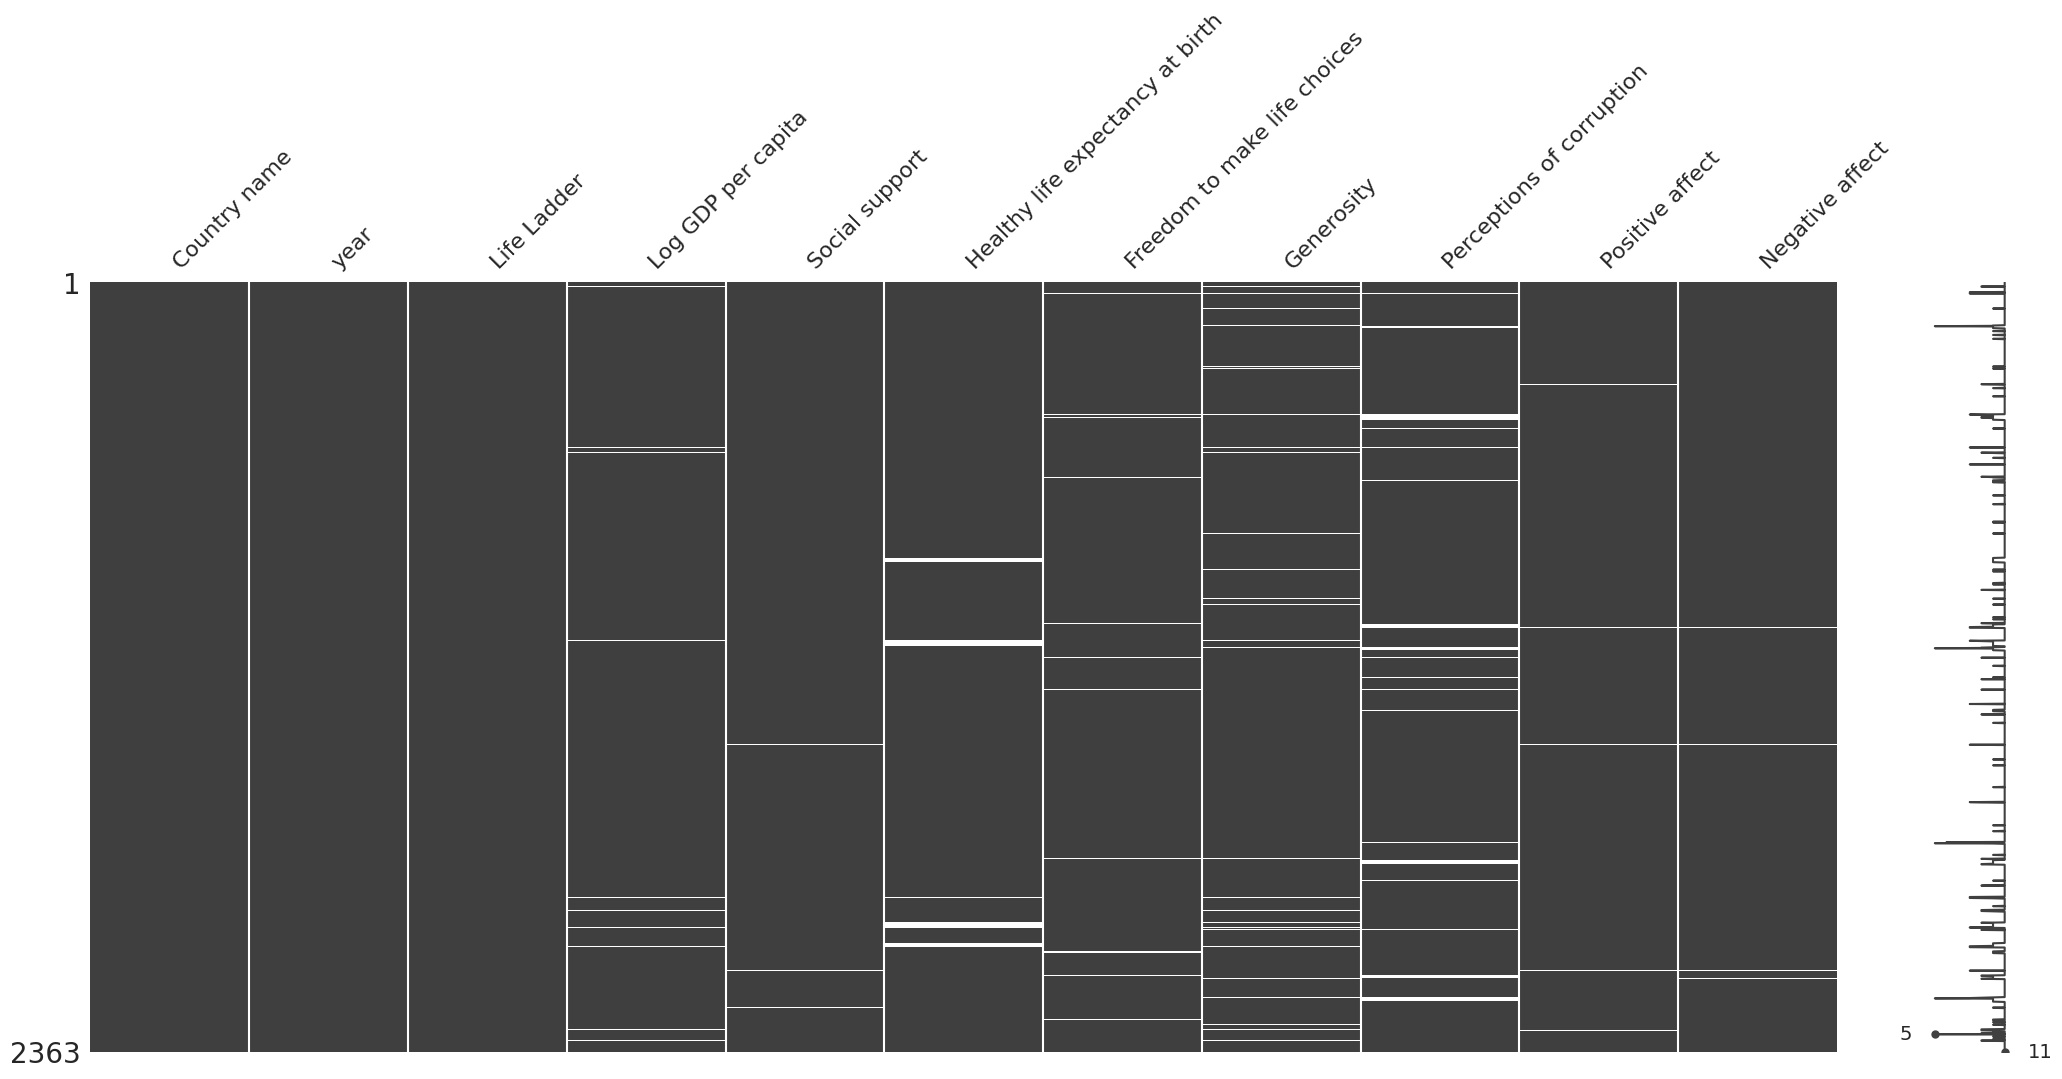

In [ ]:
import missingno as msno
msno.matrix(df);

In [ ]:
# df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == "float64" else x, axis=0)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Check the distributions of selected independent variables
#df.hist(column=['Country', 'Year', 'Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy at Birth', 'Freedom to Make Life Choices', 'Generosity', 'Perception of Corruption', 'Positive Affect', 'Negative Affect'], bins=50, figsize=(20,15))
#plt.show();

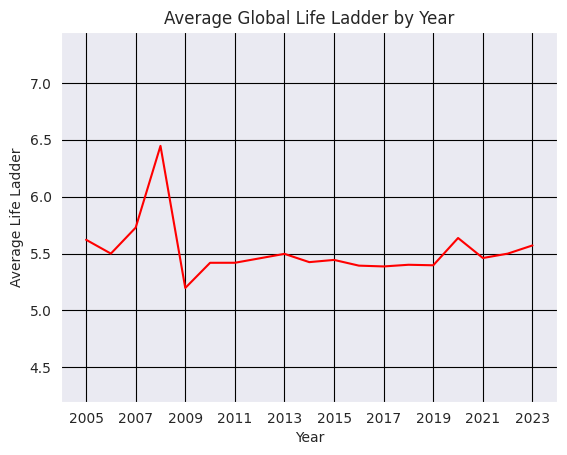

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

plt.rcParams['axes.grid'] = True
plt.rcParams['savefig.transparent'] = True

sns.set_style("darkgrid")

life_ladder_by_year = df.groupby('year')['Life Ladder'].mean()
sns.lineplot( x=df['year'].unique(), y=life_ladder_by_year, color = 'red').grid(color='black')

plt.xlabel('Year')
plt.ylabel('Average Life Ladder')

plt.title('Average Global Life Ladder by Year')

plt.xlim(df['year'].min() - 1, df['year'].max() + 1)
plt.ylim(life_ladder_by_year.min() - 1, life_ladder_by_year.max() + 1)
plt.xticks(range(df['year'].min(), df['year'].max() + 1, 2))

plt.savefig('AvgLifeLadder.png', transparent=True)

plt.show()

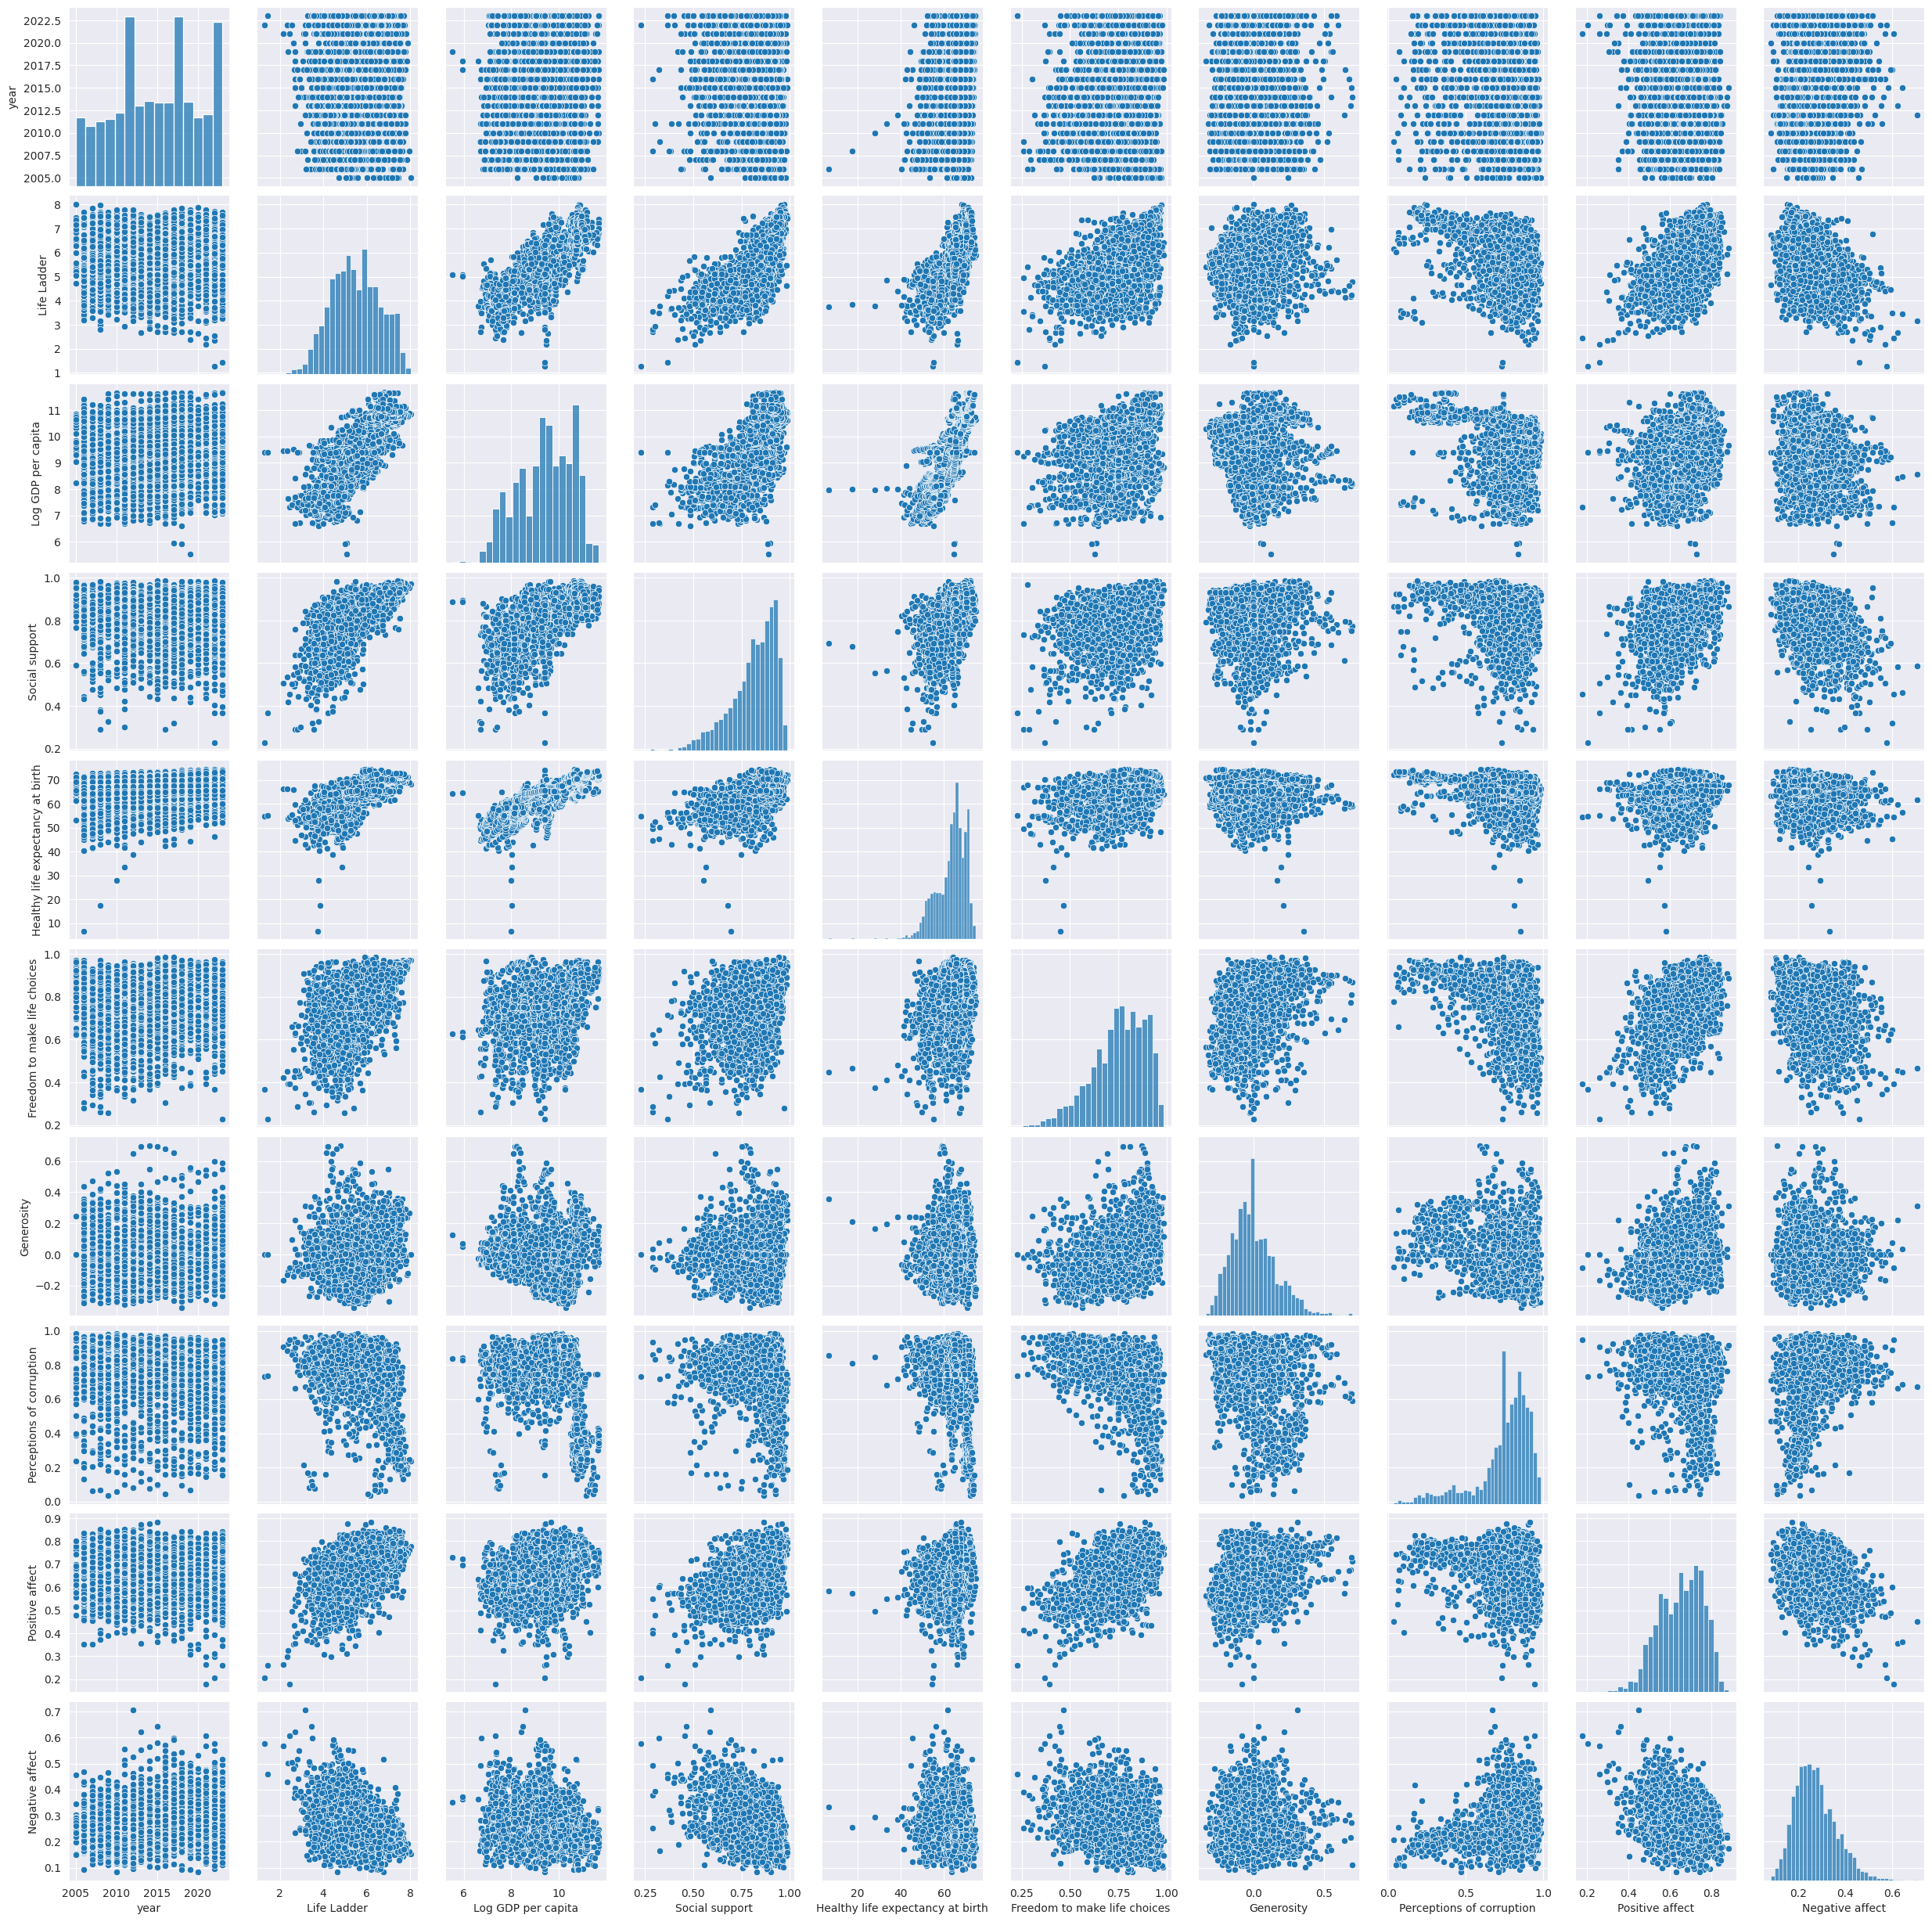

In [ ]:
sns.pairplot(df)
plt.show()

# You can click to zoom in but its hard to see the labels if you move away from the axes
# The histograms along the diagonal are helpful

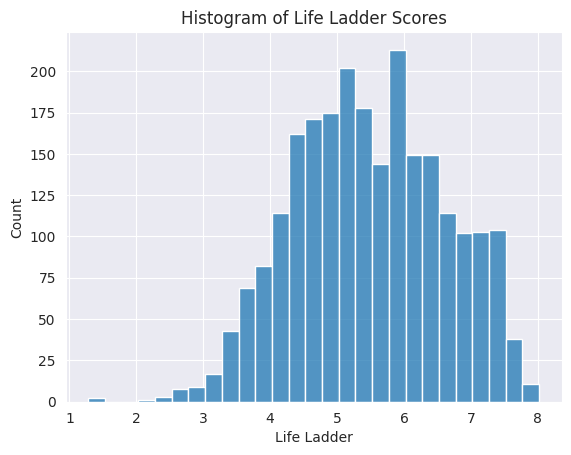

In [ ]:
plt.rcParams['axes.grid'] = True
plt.rcParams['savefig.transparent'] = True


plt.figure(facecolor='none')

sns.set_style("darkgrid")

sns.histplot(df['Life Ladder'])
plt.title("Histogram of Life Ladder Scores")

plt.savefig('HistLifeLadder.png', transparent=True)

plt.show()


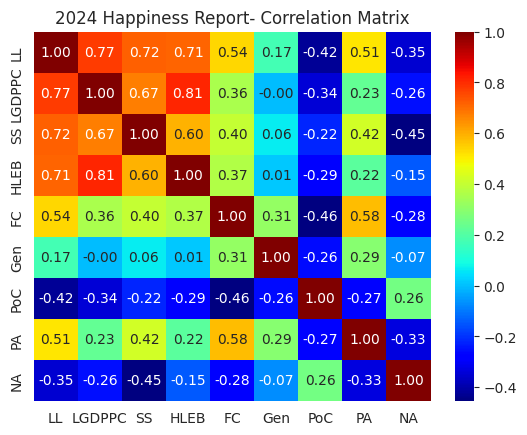

In [ ]:
corrdf = df.select_dtypes(include='float64')


new_column_names = {
    'Life Ladder': 'LL',
    'Log GDP per capita': 'LGDPPC',
    'Social support': 'SS',
    'Healthy life expectancy at birth': 'HLEB',
    'Freedom to make life choices': 'FC',
    'Generosity': 'Gen',
    'Perceptions of corruption': 'PoC',
    'Positive affect': 'PA',
    'Negative affect': 'NA'
}

corrdf.rename(columns=new_column_names, inplace=True)

corr_matrix = corrdf.select_dtypes(include='float64').corr()
sns.heatmap(corr_matrix, cmap = 'jet', fmt=".2f", annot=True)

plt.title("2024 Happiness Report- Correlation Matrix")

plt.savefig('CorrMat.png', transparent=True)
plt.show()

The following three graphs show the two variables with the most positive, most negative, and least correlation, respectively. As seen in the correlation matrix, it appears that when either Log GDP per Capita or Healthy Life Expectancy at Birth of a country increases, the other variable will generally see an increase as well. The opposite is true for the variables Perception of Corruption and Freedom to Make Life Choices. The two variables with the least correlation are Log GDP per Capita and Generosity

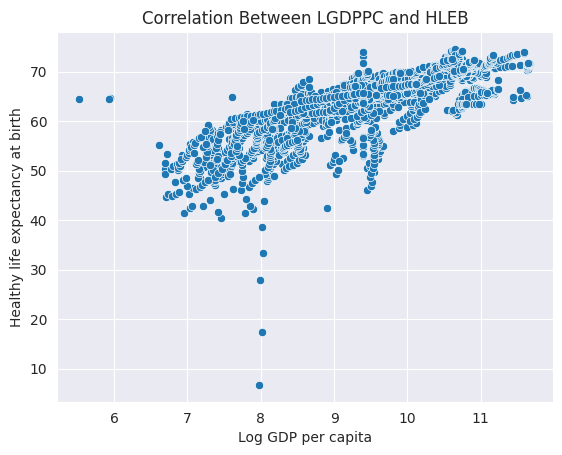

In [ ]:
sns.scatterplot(x= 'Log GDP per capita', y = 'Healthy life expectancy at birth', data = df)
plt.title('Correlation Between LGDPPC and HLEB')
plt.savefig('corrGDPHLEB.png', transparent=True)
plt.show()

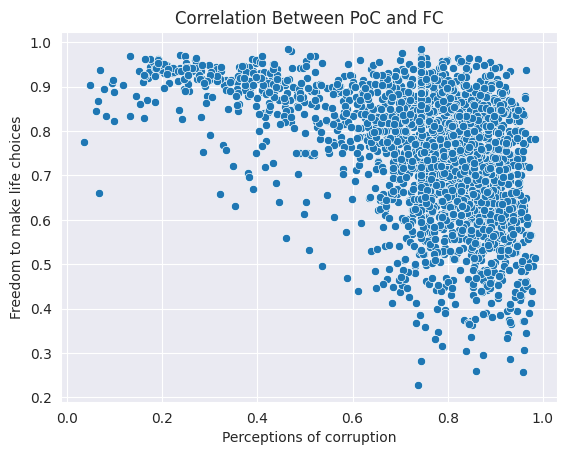

In [ ]:
sns.scatterplot(x= 'Perceptions of corruption', y = 'Freedom to make life choices', data = df)
plt.title('Correlation Between PoC and FC')
plt.savefig('corrPocFC.png', transparent=True)
plt.show()

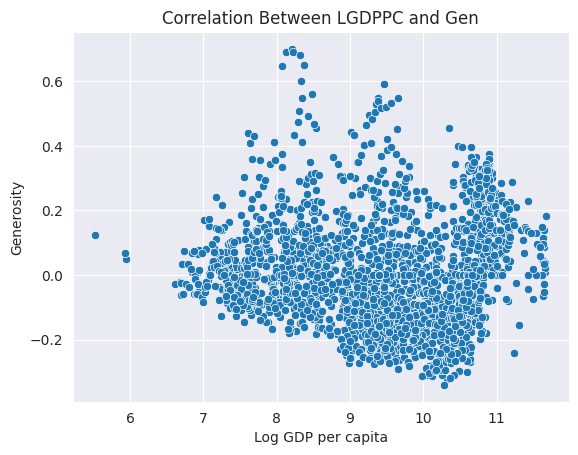

In [ ]:
sns.scatterplot(x= 'Log GDP per capita', y = 'Generosity', data = df)
plt.title('Correlation Between LGDPPC and Gen')
plt.savefig('corrGDPGen.png', transparent=True)
plt.show()

In [ ]:
df_by_country = df.groupby('Country name').mean()
df_by_country.drop('year', axis=1, inplace=True)
df_by_country.head()

Life Ladder  Log GDP per capita  Social support  \
Country name                                                    
Afghanistan      3.219933            7.827556        0.476733   
Albania          5.072750            9.416937        0.714250   
Algeria          5.392000            9.338182        0.811488   
Angola           4.420250            8.985750        0.738250   
Argentina        6.289667           10.028833        0.901833   

              Healthy life expectancy at birth  Freedom to make life choices  \
Country name                                                                   
Afghanistan                          52.711667                      0.480533   
Albania                              68.548750                      0.694937   
Algeria                              66.136364                      0.562506   
Angola                               52.150000                      0.456250   
Argentina                            66.700000                      0.777722   

              Generosity  Perceptions of corruption  Positive affect  \
Country name                                                           
Afghanistan     0.048680                   0.835800         0.421800   
Albania        -0.068187                   0.868688         0.559750   
Algeria        -0.108437                   0.698267         0.550535   
Angola         -0.093250                   0.866750         0.625750   
Argentina      -0.153222                   0.839056         0.737944   

              Negative affect  
Country name                   
Afghanistan          0.370733  
Albania              0.294563  
Algeria              0.267014  
Angola               0.351250  
Argentina            0.288333

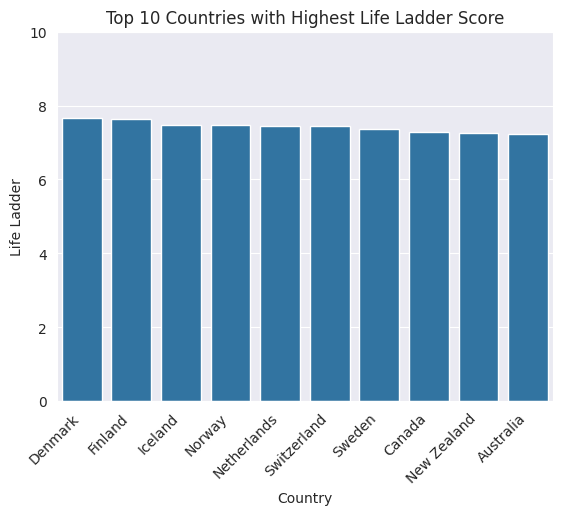

In [ ]:
dfc_sorted = df_by_country.sort_values(by='Life Ladder', ascending=False)

sns.barplot(data=dfc_sorted.head(10), x='Country name', y='Life Ladder')

plt.xlabel('Country')
plt.ylabel('Life Ladder')
plt.title('Top 10 Countries with Highest Life Ladder Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)

plt.savefig('HighestLifeScore.png', transparent=True)

plt.show()

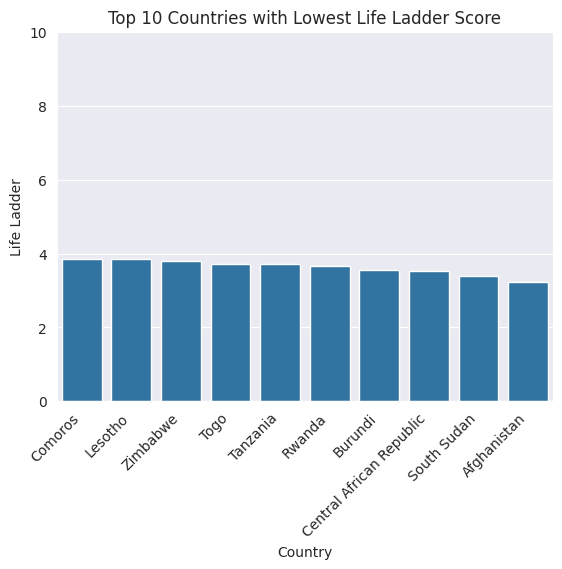

In [ ]:
sns.barplot(data=dfc_sorted.tail(10), x='Country name', y='Life Ladder')

plt.xlabel('Country')
plt.ylabel('Life Ladder')
plt.title('Top 10 Countries with Lowest Life Ladder Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)
plt.savefig('LowestLifeScore.png', transparent=True)

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Country name','year','Life Ladder'], axis = 1), df['Life Ladder'], test_size=0.2, random_state=314)

# Analysis

**Regression Analysis**

Regression is a statistical technique used to understand the relationship between a dependent variable (outcome) and one or more independent variables (predictors). The primary goal of regression is to model this relationship to predict the dependent variable's value based on the values of the independent variables. The basic form of a linear regression equation is:

\[ y = mx + b \]

where:
- \( y \) is the dependent variable (outcome),
- \( x \) is the independent variable (predictor),
- \( m \) is the slope of the line (coefficient),
- \( b \) is the y-intercept.

Steps in Regression Analysis

1. **Split the Data into Training and Testing Sets**:
   - To validate the model's performance, the data is divided into two parts: a training set and a testing set. The training set is used to build the model, while the testing set is used to evaluate its accuracy.

2. **Estimate Coefficients**:
   - Using the training data, the regression coefficients are estimated. These coefficients quantify the relationship between each predictor and the outcome, determining how much the dependent variable changes with a one-unit change in the independent variable.

3. **Assess Model Performance**:
   - The model's performance is assessed using the testing data. Key metrics, such as R-squared (R²) and Mean Squared Error (MSE), are used to evaluate how well the model explains the variability in the dependent variable and how accurate its predictions are.

In this analysis, we use Multiple Linear Regression, which extends simple linear regression by incorporating multiple independent variables. This approach enables a more comprehensive analysis of how various factors simultaneously influence the dependent variable.


In [ ]:
#Let's try standard Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training set: RMSE = {mse_train:.4f}, R^2 = {r2_train:.4f}")
print(f"Testing set: RMSE = {mse_test:.4f}, R^2 = {r2_test:.4f}")

Training set: RMSE = 0.5273, R^2 = 0.7763
Testing set: RMSE = 0.5787, R^2 = 0.7527


In [ ]:
coefficients = model.coef_
intercept = model.intercept_

for col, coef in zip(df.drop(columns = ['Country name','year','Life Ladder'], axis = 1).columns, coefficients):
    print(f"Coefficient for {col}: {coef:.4f}")
print(f"Intercept: {intercept}")

Coefficient for Log GDP per capita: 0.3818
Coefficient for Social support: 1.8764
Coefficient for Healthy life expectancy at birth: 0.0295
Coefficient for Freedom to make life choices: 0.5581
Coefficient for Generosity: 0.3424
Coefficient for Perceptions of corruption: -0.5446
Coefficient for Positive affect: 2.4087
Coefficient for Negative affect: -0.1456
Intercept: -3.0359751179602013


In [ ]:
# Not super helpful since it builds a totally different model, but weird that Negative Affect is not significantly signficant (P value less than .05)

import statsmodels.api as sm
from scipy import stats

X = df.drop(columns = ['Country name','year','Life Ladder'])
y = df['Life Ladder']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     993.7
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:59:04   Log-Likelihood:                -1887.5
No. Observations:                2363   AIC:                             3793.
Df Residuals:                    2354   BIC:                             3845.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Model Evaluation and Interpretation**

The model's R-squared (R²) value of 0.7763 indicates that approximately 77.63% of the variability in the dependent variable is explained by the independent variables included in the model. This suggests that the model provides a good fit to the data, capturing a significant portion of the variability.

The Mean Squared Error (MSE) of 0.2780 represents the average squared difference between the actual observed values and the values predicted by the model. A lower MSE indicates that the model's predictions are, on average, closer to the actual values, demonstrating better accuracy in prediction. Therefore, the model's MSE of 0.2780 suggests that it performs relatively well in making accurate predictions.

A one-unit increase in Log GDP per capita is associated with an average increase of 0.3818 units in the Life Ladder score, holding other variables constant. Similarly, a one-unit increase in Social Support is associated with an increase of 1.8764 units in the Life Ladder score. Notably, the regression coefficients for Perceptions of Corruption and Negative Affect were negative, while the other six variables had positive coefficients. This indicates that Perceptions of Corruption and Negative Affect are negatively associated with the Life Ladder score, whereas the other variables are positively associated.


An examination of the residuals provides insight into where the model is making accurate or inaccurate predictions. The model appears very accurate in predicting Life Ladder scores near 5 but shows greater variability around scores of 4 and 6. Additionally, the model does not perform particularly well for Life Ladder scores less than 4 and greater than 7.

The residuals are relatively normally distributed, which supports the assumption of a well-fit model. This normal distribution of residuals suggests that the model's errors are randomly distributed, affirming the appropriateness of the model for the data.

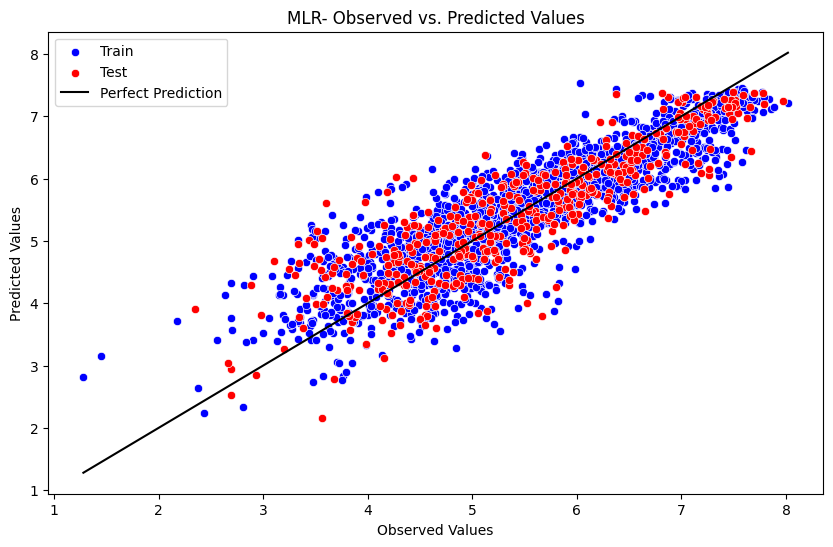

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Train')
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Test')
sns.lineplot(x=[min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             y=[min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             color='black', label='Perfect Prediction')

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('MLR- Observed vs. Predicted Values')
plt.legend()

plt.savefig('MLR-ObservedvsPredicted.png', transparent=True)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


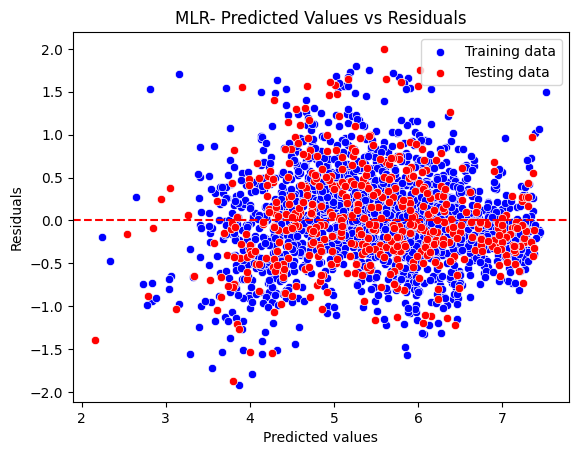

In [ ]:
sns.scatterplot(x=y_train_pred, y=y_train_pred - y_train, color='blue', label='Training data')
sns.scatterplot(x=y_test_pred, y=y_test_pred - y_test, color='red', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title("MLR- Predicted Values vs Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()

plt.savefig("MLRResidualScatter.png",transparent=True)

plt.show()

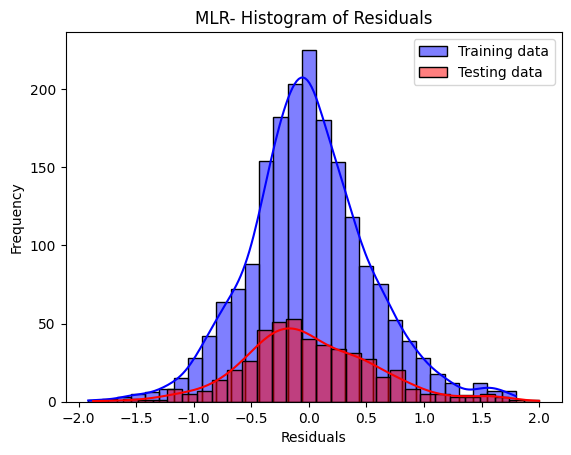

In [ ]:
sns.histplot(y_train_pred - y_train, bins=30, kde=True, color='blue', label='Training data')
sns.histplot(y_test_pred - y_test, bins=30, kde=True, color='red', label='Testing data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.title('MLR- Histogram of Residuals')


plt.savefig("MLRHistogramResiduals.png",transparent=True)

plt.show()


The residuals exhibit a stable and consistent pattern, indicating that the model is performing well. Overall, the model appears to be reliable and effective.

**LASSO Regression**

While both linear regression and Lasso regression are used for prediction and feature selection, they differ significantly in their approach to handling model complexity and preventing overfitting.

LASSO (Least Absolute Shrinkage and Selection Operator) regression is a type of linear regression that includes a regularization term to penalize large coefficients. The key difference lies in the addition of the L1 norm of the coefficients to the objective function.



Alpha and Model Complexity

The parameter 𝛼 in Lasso regression controls the trade-off between fitting the data well and maintaining a simple model. This hyperparameter is crucial in determining the model's complexity:

- Larger 𝛼 Values: Increasing 𝛼 increases the penalty for large coefficients, leading to more coefficients being shrunk to zero. This results in a simpler model with fewer predictors, reducing the risk of overfitting but potentially omitting some relevant variables.
- Smaller 𝛼 Values: Decreasing α reduces the regularization effect, making the model closer to standard linear regression. This approach keeps more predictors in the model, which can improve fit but also increase the risk of overfitting, especially in datasets with many predictors.

In [ ]:
#Lets redo with LASSO
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Country name','year','Life Ladder'], axis = 1), df['Life Ladder'], test_size=0.2, random_state=314)


In [ ]:
# #From ChatGPT
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import Lasso

# # Define a LASSO regression model
# lasso = Lasso()

# # Define the hyperparameters grid to search
# param_grid = {
#     'alpha': np.logspace(-5, 0, 50)  # Search over a range of alpha values
# }

# # Use GridSearchCV to find the best hyperparameters with cross-validation
# grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# best_alpha = grid_search.best_params_['alpha']
# print(f"Best alpha: {best_alpha}")

# # Train the final model using the best hyperparameters
# best_lasso = Lasso(alpha=best_alpha)
# best_lasso.fit(X_train, y_train)

# # Make predictions on both the training and test sets
# y_train_pred = best_lasso.predict(X_train)
# y_test_pred = best_lasso.predict(X_test)

# # Evaluate the model on the test set
# mse_test = mean_squared_error(y_test, y_test_pred)
# r2_test = r2_score(y_test, y_test_pred)

# print(f"Mean Squared Error (Test): {mse_test:.4f}")
# print(f"R-squared (Test): {r2_test:.4f}\n")

# # Evaluate the model on the training set
# mse_train = mean_squared_error(y_train, y_train_pred)
# r2_train = r2_score(y_train, y_train_pred)

# print(f"Mean Squared Error (Train): {mse_train:.4f}")
# print(f"R-squared (Train): {r2_train:.4f}\n")

# # Print the coefficients
# coefficients = best_lasso.coef_
# intercept = best_lasso.intercept_

# print("Coefficients:")
# for col_name, coef in zip(df.drop(columns = ['Country name','year','Life Ladder']), coefficients):
#     print(f"{col_name}: {coef:.4f}")
# print(f"Intercept: {intercept:.4f}\n")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

lasso = Lasso(random_state=42)
scaler = StandardScaler()
pipeline = Pipeline([('scaler', scaler), ('lasso', lasso)])
param_grid = {'lasso__alpha': np.logspace(-5, 0, 50)}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['lasso__alpha']
print(f'Optimal alpha for LASSO: {best_alpha}')

y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

Optimal alpha for LASSO: 0.000868511373751353


In [ ]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Training R^2: {train_r2:.4f}')
print(f'Test R^2: {test_r2:.4f}\n')

# Check the regression coefficients
lasso_coef = grid.best_estimator_.named_steps['lasso'].coef_

for col_name, coef in zip(df.drop(columns = ['Country name','year','Life Ladder']), lasso_coef):
     print(f"{col_name}: {coef:.4f}")

Training RMSE: 0.5273
Test RMSE: 0.5787
Training R^2: 0.7763
Test R^2: 0.7527

Log GDP per capita: 0.4312
Social support: 0.2251
Healthy life expectancy at birth: 0.1971
Freedom to make life choices: 0.0769
Generosity: 0.0534
Perceptions of corruption: -0.0965
Positive affect: 0.2528
Negative affect: -0.0121


**Model Evaluation and Interpretation**

The model's R-squared (R²) values of 0.7763 for the training set and 0.7527 for the test set indicate that approximately 77.63% and 75.27% of the variability in the dependent variable is explained by the independent variables included in the model, respectively. These values suggest that the model provides a good fit to both the training and test data, capturing a significant portion of the variability.

The model's Root Mean Squared Error (RMSE) of 0.5273 for the training set and 0.5787 for the test set represents the average squared difference between the actual observed values and the values predicted by the model, taking the square root of the result. Lower RMSE values indicate better accuracy in prediction. Therefore, the RMSE values suggest that while the model's predictions are not as accurate as the original Multiple Linear Regression (MLR), they are relatively close to the actual values.

An examination of the residuals provides insight into where the model is making accurate or inaccurate predictions. The model appears very accurate in predicting Life Ladder scores near 5 but shows greater variability around scores of 4 and 6. Additionally, the model does not perform particularly well for Life Ladder scores less than 4 and greater than 7.

The residuals are relatively normally distributed, which supports the assumption of a well-fit model. This normal distribution of residuals suggests that the model's errors are randomly distributed, affirming the appropriateness of the model for the data. These findings are consistent with the residual analysis of the MLR model, indicating similar patterns of accuracy and inaccuracy in predictions.

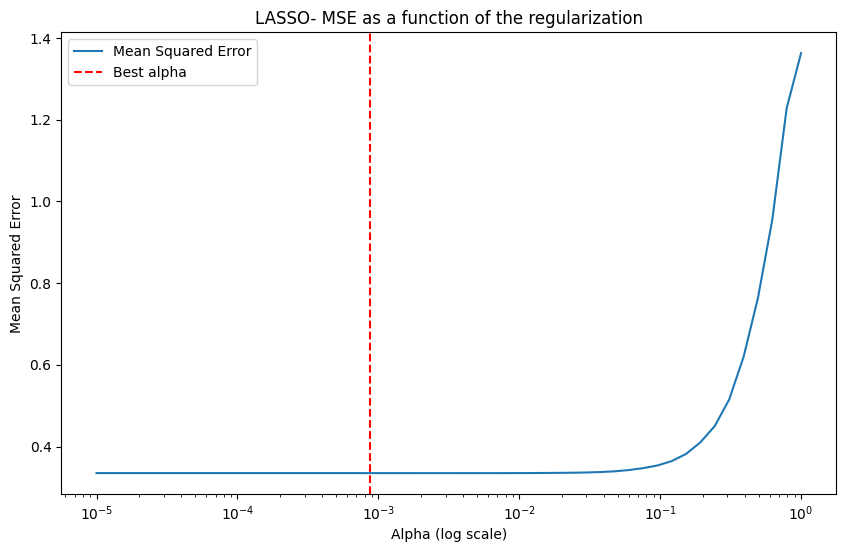

In [ ]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

mse = []
alphas = np.logspace(-5, 0, 50)

# Fit the LASSO model for each alpha and store the mean squared error
for alpha in alphas :
    lasso = Lasso(alpha=alpha, random_state=42)
    pipeline = Pipeline([('scaler', scaler), ('lasso', lasso)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

# Plot the mean squared errors against alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse, label='Mean Squared Error')
# add a vertical line to mark the best alpha
plt.axvline(x=best_alpha, color='red', linestyle='--', label='Best alpha')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('LASSO- MSE as a function of the regularization')
plt.legend()

plt.savefig("MSEFofRegularization.png",transparent=True)

plt.show()

#Checks out

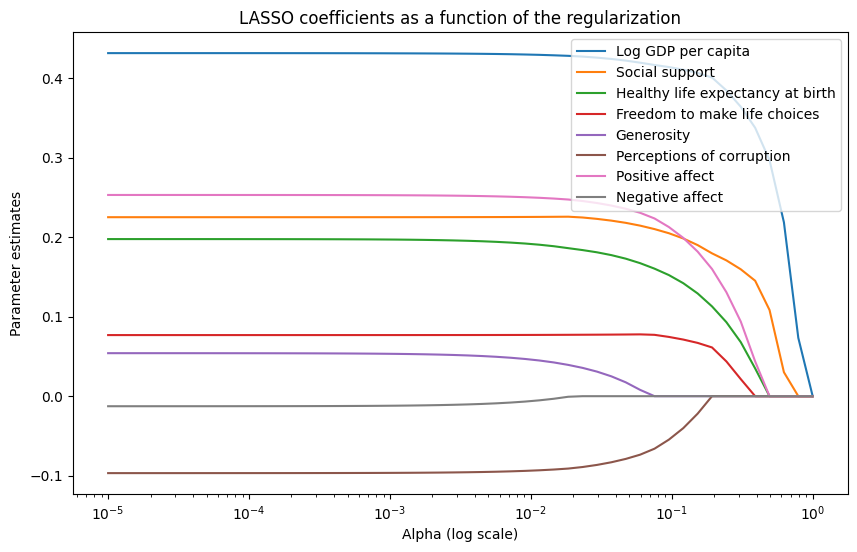

In [ ]:
coefs = []
scaler = StandardScaler()
# Fit the LASSO model for each alpha and store the coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    pipeline = Pipeline([('scaler', scaler), ('lasso', lasso)])
    pipeline.fit(X_train, y_train)
    coefs.append(pipeline.named_steps['lasso'].coef_)

# Plot the parameter estimates against alpha values
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parameter estimates')
plt.title('LASSO coefficients as a function of the regularization')
plt.legend(df.drop(columns = ['Country name','year','Life Ladder']).columns, loc='upper right')

plt.savefig("LASSOCoefficientsFofRegularization.png",transparent=True)

plt.show()


The visual representation effectively demonstrates the impact of each variable on the model, providing clear insights into their respective influences.

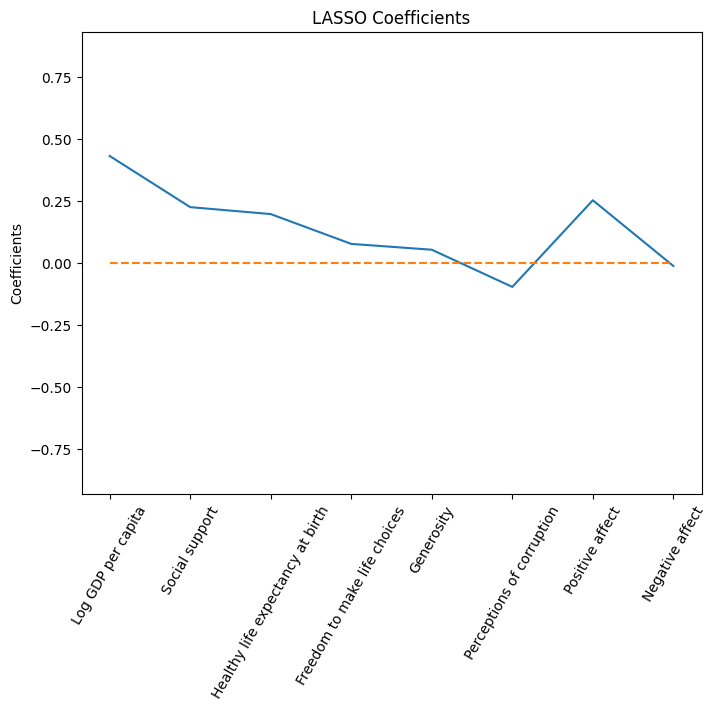

In [ ]:
# Visualize the coefficients
X = df.drop(columns = ['Country name','year','Life Ladder'])

plt.figure(figsize=(8, 6))
plt.plot(range(len(X.columns)), lasso_coef)
plt.plot(range(len(X.columns)), [0]*len(X.columns), '--')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.ylabel('Coefficients')
plt.ylim(-(lasso_coef.max() + .5), lasso_coef.max() + .5)
plt.title('LASSO Coefficients')

plt.savefig("LassoCoefficients.png",transparent=True)

plt.show()


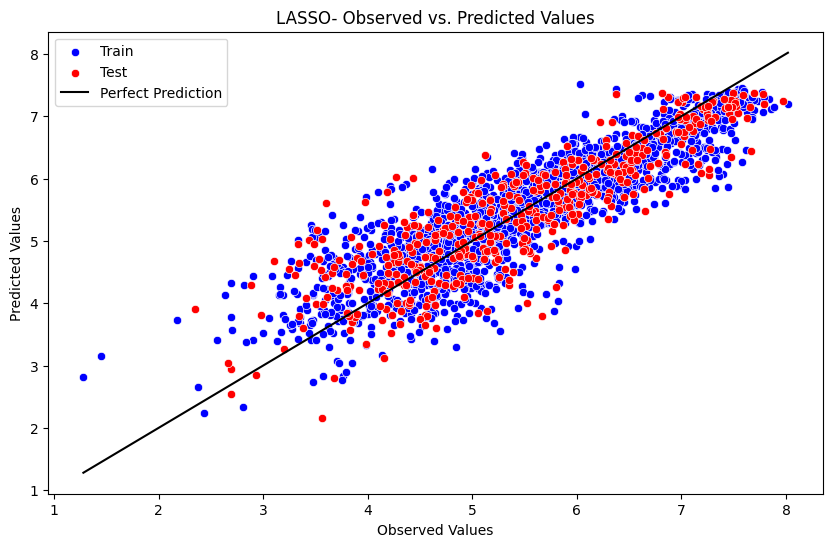

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Train')
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Test')
sns.lineplot(x=[min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             y=[min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
             color='black', label='Perfect Prediction')

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('LASSO- Observed vs. Predicted Values')
plt.legend()

plt.savefig("LASSOObservedvsPredicted.png",transparent=True)

plt.show()

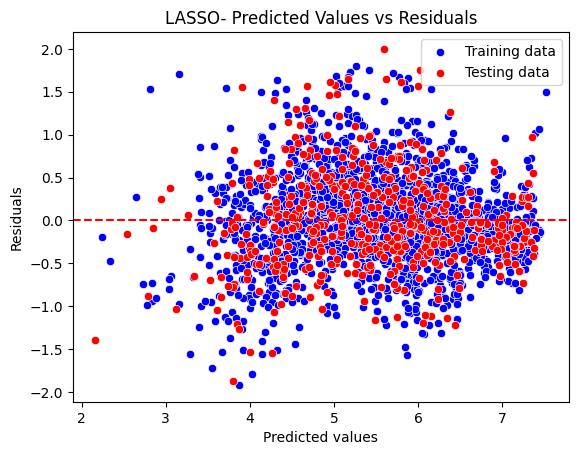

In [ ]:
sns.scatterplot(x=y_train_pred, y=y_train_pred - y_train, color='blue', label='Training data')
sns.scatterplot(x=y_test_pred, y=y_test_pred - y_test, color='red', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title("LASSO- Predicted Values vs Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()

plt.savefig("LASSOScatter-2.png",transparent=True)

plt.show()

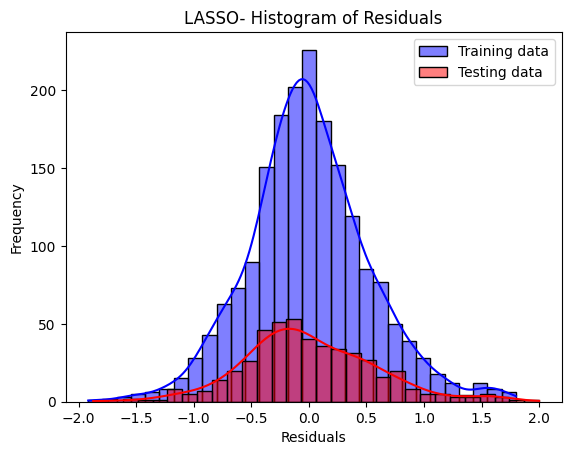

In [ ]:
sns.histplot(y_train_pred - y_train, bins=30, kde=True, color='blue', label='Training data')
sns.histplot(y_test_pred - y_test, bins=30, kde=True, color='red', label='Testing data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('LASSO- Histogram of Residuals')
plt.legend()

plt.savefig("LASSOHistogramResiduals.png",transparent=True)

plt.show()


The residuals exhibit a stable and consistent pattern, indicating that the model is performing well. Overall, the model appears to be reliable and effective.

# Conclusion

**Objectives** </p>
From this study, our team's purpose was to be able to predict a country's Life Ladder score from other variables that describe certain aspects of life of the given country. Furthermore, with the data on the importance of each factor, politicians and organizations would hopefully take action to positively influence the Life Ladder score of a country.


**Takeaways From the Lasso Regression Model**</p>
Unsurprisingly, we found in our analysis that Log GDP per Capita of a country positively affects the Life Ladder score with the highest magnitude coefficient. Generally, this means that the richer a country is, the happier the people be. It is also expected that the Negative Affect and Perceptions of Corruption variables negatively affect the Life Ladder score. However, one interesting point is that the Positive Affect variable has a high (positive) magnitude while the negative affect variable has a low (negative) magnitude. Perhaps this suggests that to have a higher Life Ladder score, rather than limiting negative moments, it is more important to promote positive moments.

Overall, it seems that the main factors for improving a country's Life Ladder score are Log GDP Per Capita, Social Support, Health Life Expectancy at Birth, and Positive Affect, with the other variables having minimal significantly less influence.</p>
**Possible Limitations**</p>
1. Many of the values of the variables that are used in this data set are subjective. Depending on the surveyed subjects, values can change depending on cultural context.
2. In the data set, there were many incomplete entries and some data values were missing. This could potentially alter the results that we found in our study.